<a href="https://colab.research.google.com/github/babakansari/DeepLearning/blob/master/RNN_for_autocomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural-network experiment for Auto Complete - Babak Ansari-Jaberi

https://www.youtube.com/watch?v=iMIWee_PXl8

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, LSTM
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
Data = [[[(i+j)/100] for i in range(5)] for j in range (100)]
Target = [(i+5)/100 for i in range(100)]


In [0]:
data = np.array(Data, dtype=float)
target = np.array(Target, dtype=float)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = 4 )

In [6]:
model = Sequential()
model.add(LSTM(1, batch_input_shape=(None, 5, 1), return_sequences=True,  activation='tanh'))
model.add(LSTM(50,  activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
#model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['accuracy'])
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,463
Trainable params: 10,463
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs = 40, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 80 samples, validate on 20 samples
Epoch 1/40





80/80 [==============================] - 2s 26ms/step - loss: 0.5522 - acc: 0.0000e+00 - val_loss: 0.4256 - val_acc: 0.0000e+00
Epoch 2/40
80/80 [==============================] - 0s 533us/step - loss: 0.5241 - acc: 0.0000e+00 - val_loss: 0.3967 - val_acc: 0.0000e+00
Epoch 3/40
80/80 [==============================] - 0s 506us/step - loss: 0.4909 - acc: 0.0000e+00 - val_loss: 0.3657 - val_acc: 0.0000e+00
Epoch 4/40
80/80 [==============================] - 0s 494us/step - loss: 0.4596 - acc: 0.0000e+00 - val_loss: 0.3340 - val_acc: 0.0000e+00
Epoch 5/40
80/80 [==============================] - 0s 507us/step - loss: 0.4251 - acc: 0.0000e+00 - val_loss: 0.2987 - val_acc: 0.0000e+00
Epoch 6/40
80/80 [==============================] - 0s 534us/step - loss: 0.3890 - acc: 0.0000e+00 - val_loss: 0.2603 - val_acc: 0.0000e+00
Epoch 7/40
80/8

In [0]:
results = model.predict(x_test)


In [11]:
x = np.array([[[0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25]]])


results2 = model.predict(x)

results2

array([[0.24420048]], dtype=float32)

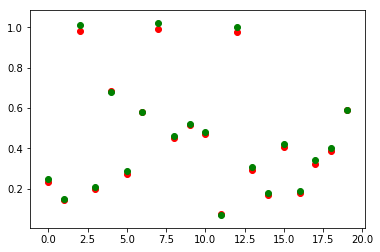

In [12]:
plt.scatter(range(20), results, c= 'r')
plt.scatter(range(20), y_test, c= 'g')
plt.show()

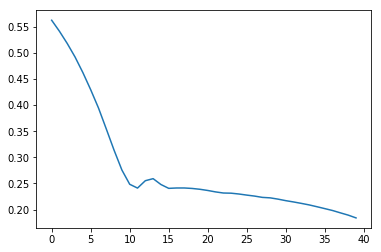

In [12]:
plt.plot(history.history['loss'])
plt.show()